<a href="https://colab.research.google.com/github/eddydq/ELE2700/blob/main/TP2_etudiant_A2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Département de génie électrique - Polytechnique Montréal

Analyse des signaux - ELE2700

TP2 version 4.0: A2025

---

Numéro d'équipe: À COMPLÉTER

Noms, prénoms et matricules: À COMPLÉTER

# $\color{#18a2f2}{\textbf{TP2 - Série de Fourier et électronique de puissance}}$

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift

## <font color='lightblue'> Contexte 1: Étude du redresseur à double alternance </font>


Les redresseurs à double alternance sont des équipements électroniques utilisés afin de convertir les parties négatives d'une source de tension en entrée en parties positives. Leur application concerne notamment dans la conception de convertisseurs AC-DC de tension ou de courant.

### $\color{#03fc9d}{\textbf{Exercice 1, évalué en classe (8pt/20):}}$

Soit l'expression de la tension sinusoïdale au bornes de la source d'alimentation en entrée :
$v_\text{e} \left( t \right) = E \sin \left( 2\pi\frac{t}{T} \right)$.

Soit l'expression mathématique de la tension en sortie : $v_\text{s} \left( t \right) =  | v_\text{e}(t)|$.

### <font color='lightpink'> Partie 1: Formes temporelles des signaux $v_\text{e}(t)$ et $v_\text{s}(t)$ </font>

$\color{orange}{\text{ Question 1a) [code]}}$

En considérant **100 périodes** de signaux pour le recueil des données, une fenêtre d'observation de **$\left[0,2T\right]$** avec **$ T= \frac{1}{60} \text{s} $** et **une période d'échantillonage** de **$T_\text{e} = 1~\mu \text{s}$**, tracer **les réponses temporelles** des signaux **$\color{red}{v_\text{e}(t)}$** et **$\color{green}{v_\text{s}(t)}$** $\color{red}{\textbf{(2pt/20)}}$

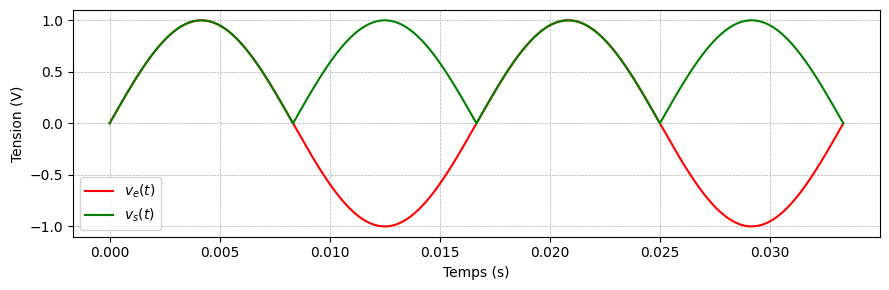

In [2]:
# Question 1a
T = 1 / 60
Te = 1e-6
nb_periods = 100
E = 1

t = np.arange(0, nb_periods * T, Te)
ve = E * np.sin(2 * np.pi * t / T)
vs = np.abs(ve)

mask = t <= 2 * T
plt.figure(figsize=(9, 3))
plt.plot(t[mask], ve[mask], color="red", label=r"$v_e(t)$")
plt.plot(t[mask], vs[mask], color="green", label=r"$v_s(t)$")
plt.xlabel("Temps (s)")
plt.ylabel("Tension (V)")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

### <font color='lightpink'> Partie 2: Série de Fourier du signal $v_\text{s}(t)$ et calcul de la THD </font>

$\color{orange}{\text{ Question 2a) [Code]}}$

 Il est possible de démontrer que les coefficients du développement en série de Fourier du signal $v_\text{s}(t)$ vérifient les relations suivantes :

\begin{align*}
A_0 &= \frac{2E}{\pi}\\
A_{n\neq 1} &= \frac{2E}{\pi} \frac{1+(-1)^n}{1-n^2}\\
A_{1} &= 0\\
B_{n} &= 0 \\
\end{align*}

Reconstruire le signal **$\color{green}{v_\text{s}(t)}$** à partir d'au moins ses $40$ premières harmoniques **non nulles** de sa décomposition en série de Fourier et le comparer au signal de la question précédente. $\color{red}{\textbf{(2pt/20)}}$

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80]


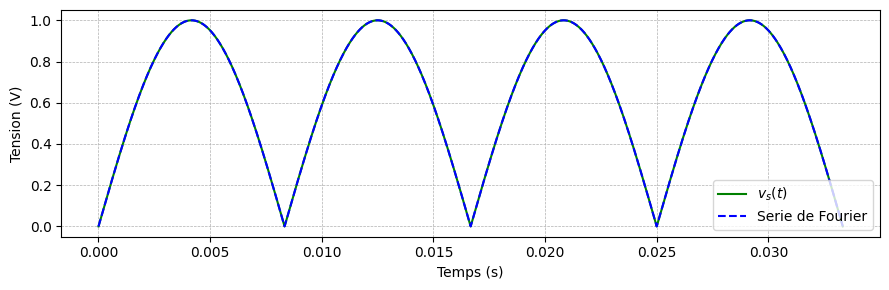

Harmoniques non nulles utilisees : 40


In [18]:
# Question 2a
T = 1 / 60
E = 1

harmonics = np.arange(2, 80+2, 2)
print(harmonics)
A0 = 2 * E / np.pi
An = (2* E / np.pi) / ((1 + (-1)**harmonics) / (1 - harmonics**2))


t = np.arange(0, nb_periods * T, Te)
ve = E * np.sin(2 * np.pi * t / T)
vs = np.abs(ve)


def compute_fourier(A0, An):
    vs_fourier = np.full_like(t, A0)
    for n, an in zip(harmonics, An):
        vs_fourier += an * np.cos(2 * np.pi * n * t / T)
    return vs_fourier


vs_fourier = compute_fourier(A0, An)

mask = t <= 2 * T
plt.figure(figsize=(9, 3))
plt.plot(t[mask], vs[mask], color="green", label=r"$v_s(t)$")
plt.plot(t[mask], vs[mask], color="blue", linestyle="--", label="Serie de Fourier")
plt.xlabel("Temps (s)")
plt.ylabel("Tension (V)")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

print(f"Harmoniques non nulles utilisees : {len(harmonics)}")

$\color{orange}{\text{ Question 2b) [Code]}}$

Superposer un tracé théorique et celui obtenu grâce aux outils numériques du spectre du signal **$\color{green}{v_\text{s}(t)}$** en allant jusqu'à l'harmonique de dégré $12$. $\color{red}{\textbf{(2pt/20)}}$

> **Quelques recommandations** :
> * Pour le tracé théorique, pour chacune des fréquences du spectre, la magnitude de la fréquence caractérisée par $n$ se calcule tel que suit : $\sqrt{A_n^2+B_n^2}$ où $n$ représente le multiple de la fréquence fondamentale
> * Vous devrez préciser l'attribut `norm='forward'` afin de normaliser les spectres de Fourier obtenus via `scipy` dans la fonction `scipy.fft`;
> * Pour assurer une cohérence entre les magntitudes de la série de Fourier obtenues analytiquement et celles obtenues via l'outil numérique, vous devrez multiplier vos normes analytiques par un facteur $\frac{1}{2}$ (hormis celle de la composante de fréquence nulle du signal, ceci découle des différentes définition du DSF);
> * Le tracé dans les axes des fréquences négatives se fait par une réflexion par rapport à l'axe des ordonnées du spectre tracé dans les fréquences positives.

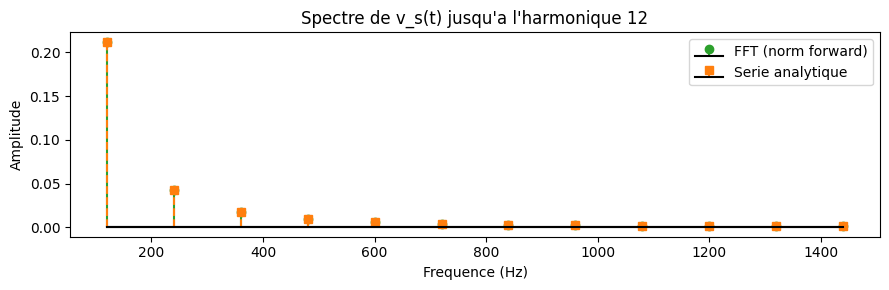

In [ ]:
# Question 2b
T = 1 / 60
E = 1
Te = t[1] - t[0]
f0 = 1 / T


Vs = fft(vs, norm="forward")
freqs = np.fft.fftfreq(t.size, Te)

indices = []
degre_harmonique = np.arange(2, 24 + 2, 2)
for n in degre_harmonique:
    freq_fond = n * f0
    indices.append(np.argmin(np.abs(freqs - freq_fond)))

amplitude_fft = np.abs(Vs[indices])

def fourier_A(n):
    if n == 0:
        return 2 * E / np.pi
    if n == 1:
        return 0.0
    return (2 * E / np.pi) * (1 + (-1)**n) / (1 - n**2)

amplitude_theo = []
for n in degre_harmonique:
    value = fourier_A(n)
    if n == 0:
        amplitude_theo.append(np.abs(value))
    else:
        amplitude_theo.append(np.abs(value) / 2)

plt.figure(figsize=(9, 3))
plt.stem(degre_harmonique * f0, amplitude_fft, linefmt="C2-", markerfmt="C2o", basefmt="k-", label="FFT (norm forward)")
plt.stem(degre_harmonique * f0, amplitude_theo, linefmt="C1--", markerfmt="C1s", basefmt="k-", label="Serie analytique")
plt.xlabel("Frequence (Hz)")
plt.ylabel("Amplitude")
plt.title("Spectre de v_s(t) jusqu'a l'harmonique 12")
plt.legend()
plt.tight_layout()
plt.show()

$\color{orange}{\text{ Question 2c) [Démarche manuscrite ou } \LaTeX \text{]}}$

En se basant sur vos résultats, quelle est la fréquence fondamentale du signal **$\color{green}{v_\text{s}(t)}$**? Comment compare-t-elle à la fréquence du signal **$\color{red}{v_\text{e}(t)}$**? Reformuler les coefficients de la série de Fourier donnés à la question 2a) en utilisant la plus petite période possible. $\color{red}{\textbf{(2pt/20)}}$

---
---
Insérez votre démarche ici.

---
---

### $\color{#03fc9d}{\textbf{Exercice 2, évalué en devoir (12pt/20):}}$

## <font color='lightblue'> Contexte 2: Étude du convertisseur AC-DC </font>

Le redresseur à double alternance est une composante importante pour la conception d'un convertisseur AC-DC. Cependant, le signal à sa sortie comprends encore des fortes oscillations, le système est alors incomplet.

### <font color='lightpink'> Partie 3: Série de Fourier du signal $v_s$ </font>

$\color{orange}{\text{ Question 3a) [Démarche manuscrite ou } \LaTeX \text{]}}$ Démontrer comment obtenir les coefficients du développement en série de Fourier présentés à la question Q2a pour le redresseur à double alternance. $\color{red}{\textbf{(4pt/20)}}$

---
---
InsÃƒÆ’Ã‚Â©rez votre dÃƒÆ’Ã‚Â©marche ici.

---
---

### <font color='lightpink'> Partie 4: Conception du filtre </font>

Il est possible d'obtenir une tension continue à partir du signal $\color{green}{v_\text{s}(t)}$ en utilisant un filtre. Le filtre suivant sera utilisé à cet effet:

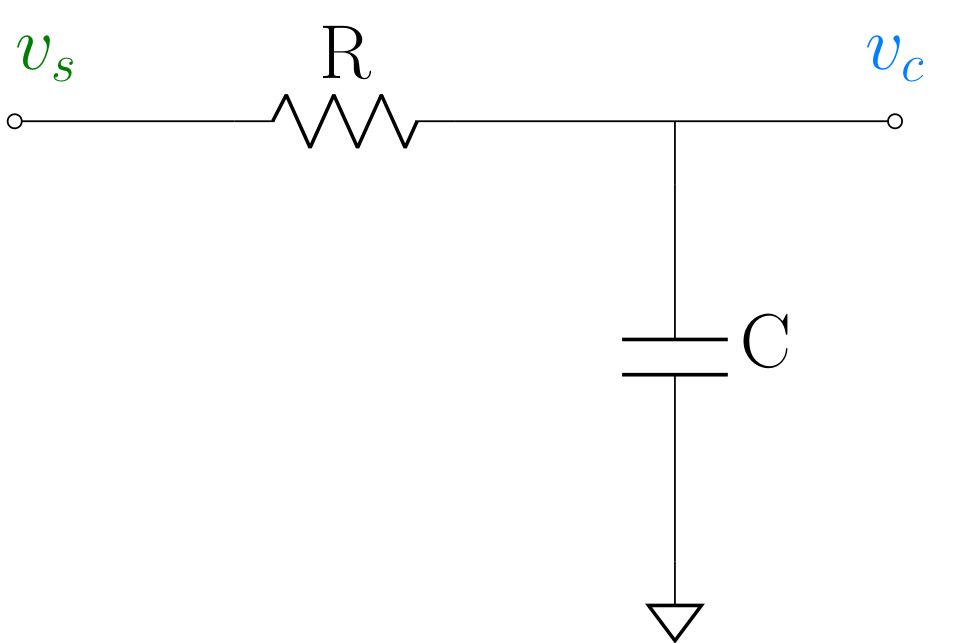


La réponse en fréquence ce filtre peut être écrite de la façon suivante:

\begin{equation*}
    H(f) = \frac{1}{1 + j 2 \pi f R C}
\end{equation*}

$\color{orange}{\text{ Question 4a) [Réponse écrite]}}$ Quel est le type de ce filtre? En observant le spectre du signal $\color{green}{v_\text{s}(t)}$, quelle fréquence(s) faut-il conserver pour obtenir une tension constante? $\color{red}{\textbf{(1pt/20)}}$

# Écrire votre code ici pour (Q4d)

$\color{orange}{\text{ Question 4b) [Démarche manuscrite ou } \LaTeX \text{]}}$ Reformuler les coefficients du développement en série de Fourier présentés à la question Q2a) pour inclure l'impact de ce filtre. Utiliser la forme exponentielle et simplifiez votre réponse. $\color{red}{\textbf{(2pt/20)}}$

---
---
InsÃƒÆ’Ã‚Â©rez votre dÃƒÆ’Ã‚Â©marche ici.

---
---

$\color{orange}{\text{ Question 4c) [Démarche manuscrite ou } \LaTeX \text{]}}$ Vous décidez de reproduire ce circuit en laboratoire pour valider vos calculs. Vous décidez d'utiliser un condensateur de 47 $\mu\mathrm{F}$. Quelle est la valeur de la resistance nécessaire pour que l'amplitude de la première harmonique non-nulle soit 50 fois plus petite que la composante constante? Utiliser la base exponentielle. $\color{red}{\textbf{(2pt/20)}}$

---
---
InsÃƒÆ’Ã‚Â©rez votre dÃƒÆ’Ã‚Â©marche ici.

---
---

$\color{orange}{\text{ Question 4d) [code]}}$

Reconstruire le signal **$\color{blue}{v_\text{c}(t)}$** à partir d'au moins ses $40$ premières harmoniques **non nulles** de sa décomposition en série de Fourier. Afficher sur la même figure le signal $\color{green}{v_\text{s}(t)}$ et comparer. Afficher un tracé théorique du spectre en allant jusqu'à l'harmonique de degré 12.  $\color{red}{\textbf{(2pt/20)}}$

In [5]:
# ÃƒÆ’Ã¢â‚¬Â°crire votre code ici pour (Q4d)



$\color{orange}{\text{ Question 4e) [Réponse écrite]}}$ Commentez sur la forme du signal **$\color{blue}{v_\text{c}(t)}$** et sur son spectre. Comment pouvez-vous améliorer la qualité du signal? $\color{red}{\textbf{(1pt/20)}}$

# Reponse 4e)

## $\color{#03fc9d}{\textbf{Précisions pour la remise:}}$

* Pour chaque exercice, répondre en ajoutant des cases de code ou de texte en dessous de la question.

* Remettre sur moodle un fichier `.ipynb` contenant tous les exercises de ce TP avec toutes les librairies et importations nécessaires pour que le code roule sans erreurs. Remettre également un fichier `.pdf` du notebook. (Voir Notes additionnelles du TP-1)

* Indiquer vos noms, vos matricules et votre numéro d'équipe au début dans l'entête du `notebook`.